In [1]:
import pandas as pd
from opytex import texenv
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn-notebook")
from IPython.core.pylabtools import figsize
figsize = (16, 8)

# Informations sur le devoir

In [2]:
ds_name = "DM_16_01_29"
classe = "309"

latex_info = {}
latex_info['titre'] =  "DM 4"
latex_info['classe'] = "309"
latex_info['date'] = "29 janvier 2016"
latex_info

{'classe': '309', 'date': '29 janvier 2016', 'titre': 'DM 4'}

# Import et premiers traitements

In [3]:
notes = pd.ExcelFile("./../../../../notes/"+classe+".xlsx")
notes.sheet_names
notes = notes.parse(ds_name)

In [4]:
notes.index

Index(['DM_16_01_29', 'Malus', 'Exercice 1', '1.1 Developper',
       '1.2 Developper', '1.3 Double developpement', '1.4 Developpement carré',
       'Exercice 2', '2.1 Addition fraction', '2.2 Addition fractions',
       '2.3 Multiplication Fraction', '2.4 Multiplication Fraction',
       'Exercice 3', '1 (developper)', '2 (multiplication)', 'Exercice 4',
       'Comparaison', 'Pythagore', 'Thalès'],
      dtype='object')

In [5]:
notes = notes.drop("Malus")

In [6]:
notes = notes.T

In [7]:
#notes = notes.drop('av_arrondi', axis=1)
#notes = notes.drop('num_sujet', axis=1)

In [8]:
barem = notes[:1]
notes = notes[1:]

In [9]:
notes
#barem

DM_16_01_29  Exercice 1  1.1 Developper  \
ABDOU Farida                   12.0         3.5               3   
ABOU BACAR Djaha               16.5         4.0               3   
AHAMADA Nabaouya               14.5         1.0               2   
AHAMADI Faina                  14.5         3.5               3   
ALI Mardhuia                   19.0         5.0               3   
ALI SOULAIMANA Chamsia         15.5         3.5               2   
ALSENE ALI MADI Stela          11.0         2.5               2   
ANDRIATAHIANA Hoby             14.0         3.5               3   
ANLI Emeline                    7.0         4.0               2   
ATHOUMANE Naouidat             15.0         5.5               3   
BOUDRA Nassifanya              19.0         6.0               3   
CHANFI Nadhrati                16.0         6.0               3   
COMBO Moinécha                 18.5         5.5               3   
HALIDI Nisma                   18.5         6.0               3   
HAMZA Samianti                  8.5         3.5               3   
HOUMADI Mouslimati             10.0         4.5               3   
HOUMADI Chaharazadi            16.5         3.0               2   
HOUMADI Nasmi                  17.5         6.0               3   
HOUMADI Dhoirfia               17.5         6.0               3   
LOUTOUFI Nachima                8.5         2.0               1   
MALIDE El-Anzize               14.0         3.5               2   
MONNE Kevin                     9.5         3.0               3   
MOUSSA Roibouanti              17.5         6.0               3   
OUSSENI Hilma                  17.5         5.5               2   
SAANLI Natali                  18.5         5.5               3   
SAID AHAMADA Roukaya           12.5         6.0               3   
SANDA Issoufi                   9.5         2.5               3   
SOILIHI Soifia                 15.5         5.0               3   
SOUFIANI Laila                  2.5         0.0               0   
YOUSSOUF Sitirati               6.5         2.0               3   

                        1.2 Developper  1.3 Double developpement  \
ABDOU Farida                         3                         1   
ABOU BACAR Djaha                     1                         2   
AHAMADA Nabaouya                     0                         0   
AHAMADI Faina                        1                         1   
ALI Mardhuia                         2                         2   
ALI SOULAIMANA Chamsia               3                         2   
ALSENE ALI MADI Stela                1                         1   
ANDRIATAHIANA Hoby                   2                         1   
ANLI Emeline                         2                         2   
ATHOUMANE Naouidat                   3                         2   
BOUDRA Nassifanya                    3                         3   
CHANFI Nadhrati                      3                         3   
COMBO Moinécha                       2                         3   
HALIDI Nisma                         3                         3   
HAMZA Samianti                       1                         1   
HOUMADI Mouslimati                   2                         2   
HOUMADI Chaharazadi                NaN                         2   
HOUMADI Nasmi                        3                         3   
HOUMADI Dhoirfia                     3                         3   
LOUTOUFI Nachima                     1                         2   
MALIDE El-Anzize                     3                         1   
MONNE Kevin                          1                         2   
MOUSSA Roibouanti                    3                         3   
OUSSENI Hilma                        3                         3   
SAANLI Natali                        2                         3   
SAID AHAMADA Roukaya                 3                         3   
SANDA Issoufi                        1                         1   
SOILIHI Soifia                       3    

## Supression des notes inutiles 

In [10]:
notes = notes[notes[ds_name].notnull()]

In [11]:
notes = notes.astype(float)

## Traitement des notes

In [12]:
notes.T.index

Index(['DM_16_01_29', 'Exercice 1', '1.1 Developper', '1.2 Developper',
       '1.3 Double developpement', '1.4 Developpement carré', 'Exercice 2',
       '2.1 Addition fraction', '2.2 Addition fractions',
       '2.3 Multiplication Fraction', '2.4 Multiplication Fraction',
       'Exercice 3', '1 (developper)', '2 (multiplication)', 'Exercice 4',
       'Comparaison', 'Pythagore', 'Thalès'],
      dtype='object')

Liste des exercices (non noté en compétences)

In [13]:
list_exo = ["Exercice "+str(i+1) for i in range(4)]
list_exo

['Exercice 1', 'Exercice 2', 'Exercice 3', 'Exercice 4']

Les autres types de notes (presentation, malus...) qui ne sont pas en compétences

In [14]:
autres_notes = []
#notes = notes.T.drop("Malus").T

In [15]:
notes[list_exo] = notes[list_exo].applymap(lambda x:round(x,2))
#notes[list_exo]

Les éléments avec notes et les éléments par compétences (sous_exo)

In [16]:
item_avec_note = list_exo + [ds_name] + autres_notes
sous_exo = [i for i in notes.T.index if i not in item_avec_note]
sous_exo

['1.1 Developper',
 '1.2 Developper',
 '1.3 Double developpement',
 '1.4 Developpement carré',
 '2.1 Addition fraction',
 '2.2 Addition fractions',
 '2.3 Multiplication Fraction',
 '2.4 Multiplication Fraction',
 '1 (developper)',
 '2 (multiplication)',
 'Comparaison',
 'Pythagore',
 'Thalès']

In [17]:
def toRepVal(val):
    if pd.isnull(val):
        return "\\NoRep"
    elif val == 0:
        return "\\RepZ"
    elif val == 1:
        return "\\RepU"
    elif val == 2:
        return "\\RepD"
    elif val == 3:
        return "\\RepT"
    else:
        return val

In [18]:
notes[item_avec_note] = notes[item_avec_note].fillna(".")
#notes

In [19]:
eleves = notes.copy()
eleves[sous_exo] = notes[sous_exo].applymap(toRepVal)

In [20]:
len(notes.T.index)

18

# Un peu de statistiques

In [21]:
notes[ds_name].describe()

count    30.000000
mean     13.766667
std       4.356393
min       2.500000
25%      10.250000
50%      14.750000
75%      17.500000
max      19.000000
Name: DM_16_01_29, dtype: float64

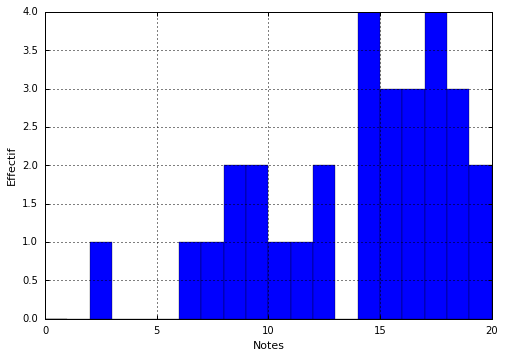

In [22]:
#notes_seules = notes[ds_name]
ax = notes[ds_name].hist(bins = barem[ds_name][0], range=(0,barem[ds_name][0]), )
ax.set_xlabel("Notes")
ax.set_ylabel("Effectif")
#notes_seules.hist()

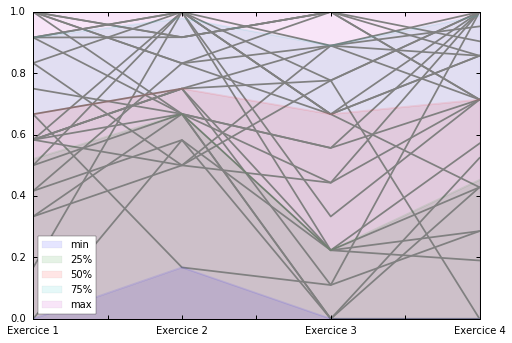

In [23]:
# Normalisation des notes de chaque exo
notes_exo_norm = notes[list_exo] / barem[list_exo].values[0,:]
#notes_exo_norm
ax = notes_exo_norm.T.plot(color = "gray", legend = False, )
d_norm =  notes_exo_norm.describe()
d_norm.T[["min", "25%", "50%", "75%", "max"]].plot(ax=ax, kind="area", stacked = False, alpha=.1)

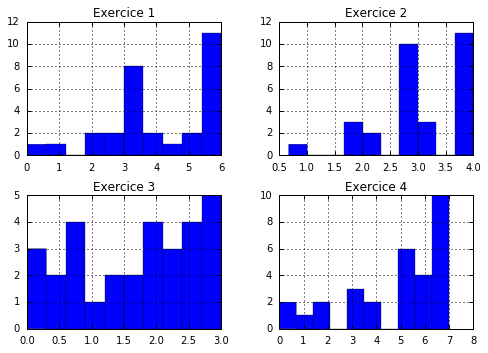

In [24]:
ax = notes[list_exo].hist()

In [25]:
notes_questions = notes[sous_exo]
notes_analysis = notes_questions.describe()
notes_analysis

1.1 Developper  1.2 Developper  1.3 Double developpement  \
count       30.000000       29.000000                 30.000000   
mean         2.600000        2.034483                  1.900000   
std          0.723974        1.017095                  0.994814   
min          0.000000        0.000000                  0.000000   
25%          2.000000        1.000000                  1.000000   
50%          3.000000        2.000000                  2.000000   
75%          3.000000        3.000000                  3.000000   
max          3.000000        3.000000                  3.000000   

       1.4 Developpement carré  2.1 Addition fraction  2.2 Addition fractions  \
count                28.000000              30.000000               30.000000   
mean                  1.892857               2.266667                2.200000   
std                   1.196887               1.112107                0.961321   
min                   0.000000               0.000000                0.000000   
25%                   1.000000               2.000000                2.000000   
50%                   2.000000               3.000000                2.000000   
75%                   3.000000               3.000000                3.000000   
max                   3.000000               3.000000                3.000000   

       2.3 Multiplication Fraction  2.4 Multiplication Fraction  \
count                    30.000000                    30.000000   
mean                      2.333333                     2.433333   
std                       0.711159                     1.006302   
min                       0.000000                     0.000000   
25%                       2.000000                     2.000000   
50%                       2.000000                     3.000000   
75%                       3.000000                     3.000000   
max                       3.000000                     3.000000   

       1 (developper)  2 (multiplication)  Comparaison  Pythagore     Thalès  
count       30.000000           28.000000    28.000000  29.000000  27.000000  
mean         1.833333            1.750000     1.285714   2.517241   2.222222  
std          1.116748            1.142609     1.410467   0.784706   1.050031  
min          0.000000            0.000000     0.000000   0.000000   0.000000  
25%          1.000000            1.000000     0.000000   2.000000   2.000000  
50%          2.000000            2.000000     0.500000   3.000000   3.000000  
75%          3.000000            3.000000     3.000000   3.000000   3.000000  
max          3.000000            3.000000     3.000000   3.000000   3.000000

In [26]:
# J'aimerai récupérer le nom des questions qui ont été le moins répondus
notes_analysis[:1]

1.1 Developper  1.2 Developper  1.3 Double developpement  \
count              30              29                        30   

       1.4 Developpement carré  2.1 Addition fraction  2.2 Addition fractions  \
count                       28                     30                      30   

       2.3 Multiplication Fraction  2.4 Multiplication Fraction  \
count                           30                           30   

       1 (developper)  2 (multiplication)  Comparaison  Pythagore  Thalès  
count              30                  28           28         29      27

# Preparation du fichier .tex

In [28]:
bilan = texenv.get_template("tpl_bilan.tex")
with open("./bilan"+classe+".tex","w") as f:
    f.write(bilan.render(eleves = eleves, barem = barem, ds_name = ds_name, latex_info = latex_info, nbr_questions = len(barem.T)))

## Bilan à remplir

In [28]:
bilan = texenv.get_template("tpl_bilan.tex")
with open("./fill_bilan.tex","w") as f:
    f.write(bilan.render(eleves = [("Nom", barem = barem, ds_name = ds_name, latex_info = latex_info, nbr_questions = len(barem.T)))

SyntaxError: invalid syntax (<ipython-input-28-5b3ec646b48a>, line 3)